### Imports

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load SDSS data
TODO: Get data from SDSS on demand

In [136]:
data = pd.read_csv('galdata.csv', header=1)
# data = pd.read_csv('cluster.csv', header=1)

### Choose color

In [137]:
long_w = 'i'
short_w = 'r'
color = short_w+'-'+long_w
data[color] = data[short_w] - data[long_w]

### Load redsequence data for chosen color

In [138]:
ri = pd.read_csv('redsequenceri.txt', header=None).T
ri.columns = ['slope','yinter']

### Generate redshift list
TODO: Pull from source file

In [139]:
start = 0.1875
step = 0.0125
stop = start + step*len(ri['slope'])
ri['z'] = np.arange(start, stop, step)

### Q correction
TODO: Cite this

In [140]:
ri['Q'] = -0.380499*np.square(ri['z']) + -0.980093*ri['z'] - 1.1193*np.power(10.,-7)

### M*
TODO: Cite this

In [141]:
M_stari_local = -22.65725056
ri['M*'] = M_stari_local + ri['Q']

### K Corrections
TODO: Get data for other colors

In [142]:
kcorr_i = pd.read_csv('kcorr_i.csv', header=0)
kcorr_i['min_z'] = np.arange(0.1, 0.1+0.01*len(kcorr_i['k']), 0.01)
kcorr_i['max_z'] = np.arange(0.11, 0.11+0.01*len(kcorr_i['k']), 0.01)
ri['k'] = np.zeros(len(ri['z']))
i = 0
for z in ri['z']:
    k = kcorr_i[(z >= kcorr_i['min_z'])&(z < kcorr_i['max_z'])]['k']
    ri.loc[i]['k'] = k
    i+=1

### Luminosity Distance from Redshift
TODO: Get the desired cosmology

In [163]:
from astropy.cosmology import Planck13 as cosmo
ri['lum_dist'] = cosmo.luminosity_distance(ri['z'])*pow(10,6) # Parsecs
# print(ri[['z','lum_dist']])

### m*

In [144]:
ri['m*'] = ri['M*'] + 5.0*(np.log10(ri['lum_dist']) - 1) + ri['k']

### Completeness

21.43409676


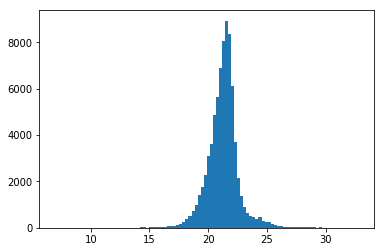

In [145]:
completeness = plt.hist(data[long_w], bins=100)
# print(completeness)
m_limit = completeness[1][completeness[0].argmax()]
print(m_limit)

### Set bright and faint magnitude limits for each red sequence

In [164]:
ri['m_min'] = ri['m*'] - 2.0
ri['m_max'] = ri['m*'] + 2.0

### Look at red sequence lines

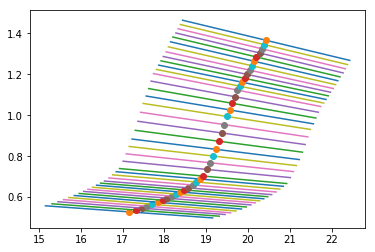

In [165]:

for line in ri.T:
    x_vals = np.linspace(ri.T[line]['m_min'], ri.T[line]['m_max'], 100)
    y_vals = ri.T[line]['slope']*x_vals + ri.T[line]['yinter']
    plt.plot(x_vals, y_vals)
    plt.plot(ri.T[line]['m*'], ri.T[line]['slope']*ri.T[line]['m*'] + ri.T[line]['yinter'], 'o')
plt.show()

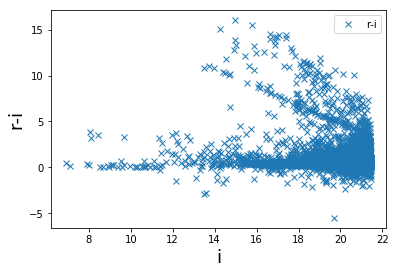

In [167]:
plt.plot(data.loc[data[long_w]<m_limit,long_w],data.loc[data[long_w]<m_limit,color],'x')
plt.xlabel(long_w, fontsize=18)
plt.ylabel(color, fontsize=18)
plt.legend()

### Red sequence groups

In [170]:
groups = []
w = 0.075
data['grouped'] = 0
for line in ri.T:
    if ri.T[line]['m_max'] < m_limit:
        
        cond1 = data[color].le(data[long_w]*ri.T[line]['slope'] + ri.T[line]['yinter'] + w/2.0)
        cond2 = data[color].ge(data[long_w]*ri.T[line]['slope'] + ri.T[line]['yinter'] - w/2.0)
        cond3 = data[long_w].le(ri.T[line]['m_max'])
        cond4 = data[long_w].ge(ri.T[line]['m_min'])
        c = cond1 & cond2 & cond3 & cond4
        print(data.loc[c].shape)
        
        
        data.loc[c,'grouped'] += 1
#         ra_ = data.loc[c,'ra'] * np.pi/180.0
#         dec_ = data.loc[c,'dec'] * np.pi/180.0
#         Sdec_ = np.sin(dec_)
#         Cdec_ = np.cos(dec_)
        
#         ra_mid = (data.loc[c,'ra'].max() + data.loc[c,'ra'].min())/2.0
#         dec_mid = (data.loc[c,'dec'].max() + data.loc[c,'dec'].min())/2.0

        dist_mpc = ri.T[line]['lum_dist']*pow(10,-6)
        phi = (90.0-data.loc[c,'dec']) * np.pi/180.0
        theta = data.loc[c,'ra'] * np.pi/180.0
        
        x_ = dist_mpc*np.sin(theta)*np.cos(phi)
        y_ = dist_mpc*np.sin(theta)*np.sin(phi)
        z_ = dist_mpc*np.cos(theta)
#         data.loc[c,'x'] = x_
#         data.loc[c,'y'] = y_
        
        groups.append(np.column_stack((data.loc[c,'objid'], x_, y_, z_, data.loc[c,color], data.loc[c,long_w])))
#         groups.append(np.column_stack((ra_, dec_, Sdec_, Cdec_, data.loc[c,color])))
        
# data = data[data['grouped']!=0]
# print(groups)
ID_ = 0
X_ = 1
Y_ = 2
Z_ = 3
# RA_ = 0
# DEC_ = 1
# sDEC_ = 2
# cDEC_ = 3
C_ = 4
LW_ = 5

(767, 19)
(951, 19)
(1109, 19)
(1263, 19)
(1426, 19)
(1551, 19)
(1644, 19)
(1676, 19)
(1711, 19)
(1814, 19)
(1812, 19)
(1822, 19)
(1843, 19)
(1850, 19)
(1793, 19)
(1768, 19)
(1708, 19)
(1703, 19)
(1605, 19)
(1586, 19)
(1568, 19)
(1519, 19)
(1514, 19)
(1486, 19)


[222.16469185 222.2777026  222.5070112  ... 224.91482345 224.91687423
 224.84402211] deg
[58.52633541 58.58215072 58.45064884 ... 57.91998132 58.00787929
 58.10982044] deg


### Look at groups in Color-Magnitude Space

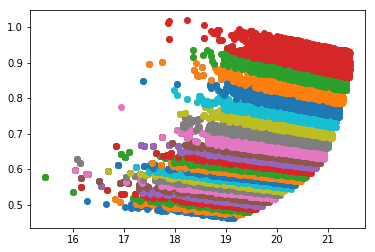

In [172]:
for g in groups:
    plt.plot(g[:,LW_], g[:,C_],'o')
plt.show()

### Histogram of number of groups each object is in

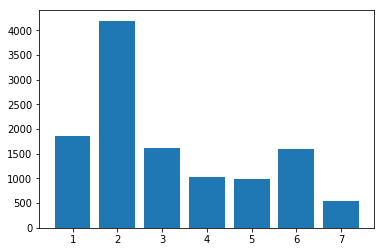

In [173]:
unique, counts = np.unique(data['grouped'], return_counts=True)
counts = np.asarray((unique, counts)).T
counts = counts[1:,:]
plt.bar(counts[:,0], counts[:,1]);

### Clustering of Field Data

In [174]:
from scipy.cluster.hierarchy import fcluster, linkage

# data.loc[:,'N_cluster'] = 0

max_radius = 10.0 #MPC #0.381596984235

# def ang_sep(p1, p2): 
#     return np.arccos(p1[sDEC_]*p2[sDEC_] + p1[cDEC_]*p2[cDEC_]*np.cos(p1[RA_] - p2[RA_]))

print('Total',len(groups))
for i in range(len(groups)):
   
    # Observation
    X = groups[i][:,[X_,Y_,Z_]]
               
    # Link
    Z = linkage(X, 'complete')
    
    # Cluster
#     dist_mpc = ri.T[line]['lum_dist']*pow(10,-6)
#     max_ang_sep = 2.0*np.arcsin(max_radius/(2*dist_mpc)) # Radian between 0 and pi/2
    labels = fcluster(Z, max_radius, criterion='distance')
    
#     db = DBSCAN(eps = r, min_samples = N).fit(X)
#     labels = db.labels_
    
    # Get number of objs in each cluster
    unique, counts = np.unique(labels, return_counts=True)
    counts = np.asarray((unique, counts)).T
    n = np.zeros(len(labels))
    for ni in counts:
        n[labels==ni[0]] = ni[1]
    
    # Assign
    groups[i] = np.hstack((groups[i], np.reshape(n, (len(n),1))))
#     data.loc[group,'N_cluster'] += n
    
    i += 1
    print(i, end=', ')
    

Total 24
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 

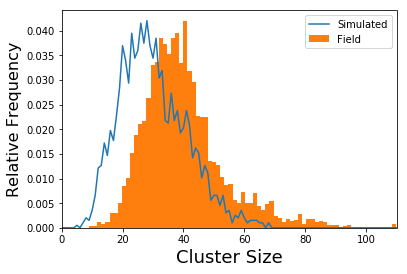

In [173]:
# Simulated data
plt.plot(range(len(cluster_size)), cluster_size/np.sum(cluster_size), label='Simulated');

    
# Field data
clustered = data['N_cluster']/data['grouped']
plt.hist(clustered, bins = 75, normed=True, label='Field')

plt.xlim([0,clustered.max()])
plt.xlabel('Cluster Size', fontsize=18)
plt.ylabel('Relative Frequency', fontsize=16)
plt.legend()
plt.show()

### Get random group

6 1644


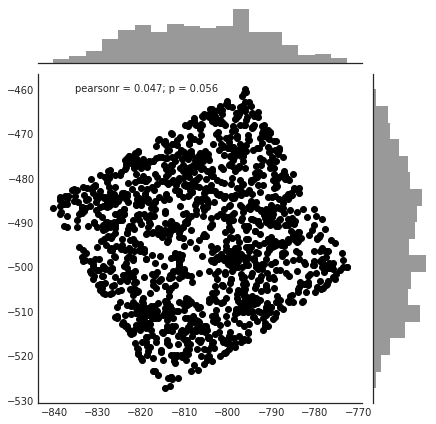

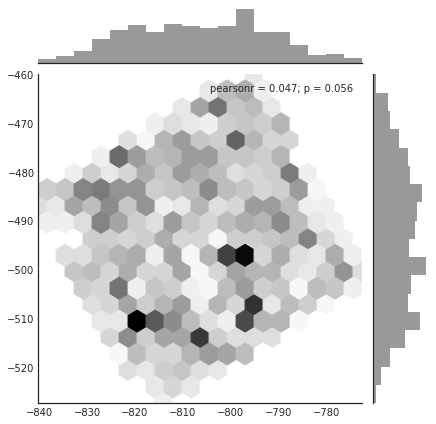

In [236]:
r = np.random.randint(len(groups))
X = groups[r]
print(r,len(X))
with sns.axes_style("white"):
    sns.jointplot(x=X[:,X_], y=X[:,Y_], color="k")
with sns.axes_style("white"):
    sns.jointplot(x=X[:,X_], y=X[:,Y_], kind='hex', color="k")

### Color Distribution

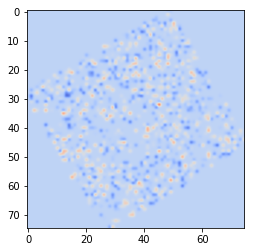

In [243]:
from scipy import stats
Z = stats.binned_statistic_2d(X[:,X_], X[:,Y_], X[:,C_], bins=75)[0]
Z = np.where(np.isnan(Z),np.nanmean(Z),Z)
plt.imshow(np.rot90(Z), interpolation='gaussian', cmap='coolwarm')

### Long_w m Distribution

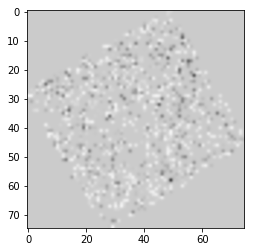

In [248]:
from scipy import stats
Z = stats.binned_statistic_2d(X[:,X_], X[:,Y_], X[:,LW_], bins=75)[0]
Z = np.where(np.isnan(Z),np.nanmean(Z),Z)
plt.imshow(np.rot90(Z), interpolation='gaussian', cmap='gray')

### N_cluster Distribution

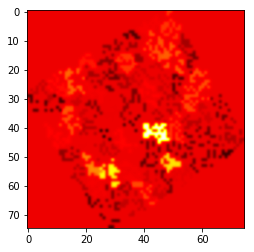

In [242]:
from scipy import stats
Z = stats.binned_statistic_2d(X[:,X_], X[:,Y_], X[:,-1], bins=75)[0]
Z = np.where(np.isnan(Z),np.nanmean(Z),Z)
plt.imshow(np.rot90(Z), interpolation='gaussian', cmap='hot')

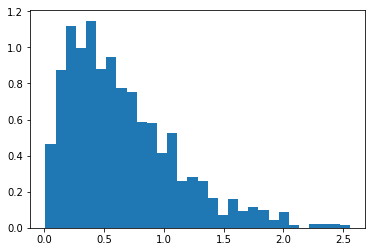

In [239]:
from scipy.spatial import KDTree

kd = KDTree(X[:,[X_,Y_,Z_]])
dist = kd.query(X[:,[X_,Y_,Z_]], k=2)[0][:,1]

# y = 2*np.pi*x*N/A*np.exp(-np.pi*np.square(x)*N/A)
plt.hist(dist, bins = 30,  normed = True);

### Dendrogram

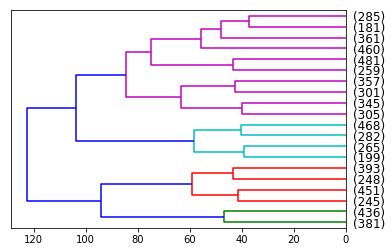

In [186]:
from scipy.cluster.hierarchy import dendrogram
dn = dendrogram(Z, p = 20, truncate_mode='lastp',
           show_leaf_counts=True, orientation='left')
plt.show()

In [209]:
from astropy import units as u
from astropy.coordinates import SkyCoord
_ra = np.asarray(data.loc[sg,'ra'])*u.degree
_dec = np.asarray(data.loc[sg,'dec'])*u.degree

s_coords = SkyCoord(ra=_ra, dec=_dec)
print(s_coords)

<SkyCoord (ICRS): (ra, dec) in deg
    [(222.16469185, 58.52633541), (222.5070112 , 58.45064884),
     (222.27843947, 58.42551102), ..., (224.84258317, 57.93943213),
     (224.91687423, 58.00787929), (224.84402211, 58.10982044)]>
